In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve,r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
import shutil
import graphviz
import dtreeviz


In [2]:
# 读取数据
data = pd.read_csv(r'D:\ArcGISProjects\workspace\duyun\result_table\feature_dy_haveph.csv')
print(len(data))
# 删除有缺失值的行
# data.dropna(inplace=True)
# len(data),data.columns

# 填补缺失值为列均值
data.fillna(data.mean(),inplace=True)

6498


In [51]:
# data.drop(columns=['pH'],inplace=True)

In [3]:
data

,pH,BIO,PRE,SRA,TMP,VAP,WIN,NDVI,TDQS,LIGHT,...,ProfileCurvature,RelativeSlopePosition,Slope,TopographicWetnessIndex,TotalCatchmentArea,ValleyDepth,DEM,LON,LAT,prediction_ph
0,7.00,190.86998,98.666664,13017.417,16.433334,1.590833,1.550000,4957.3335,11,0.38,...,0.002410,0.098463,0.044694,5.466934,71.02434,63.278564,659.9,477615.0,2912145.0,6.754600
1,6.26,190.86998,98.666664,13017.417,16.433334,1.590833,1.550000,4957.3335,11,0.44,...,0.009316,0.173775,0.372854,4.767581,317.61050,38.721313,663.8,477545.0,2912550.0,6.682734
2,5.00,190.69460,98.666664,13014.500,16.366667,1.585833,1.550000,5189.5835,11,0.29,...,-0.001505,0.887517,0.199547,5.328438,237.03818,8.369263,809.8,477515.0,2911055.0,5.276567
3,4.56,193.19330,101.250000,12963.917,15.275001,1.498333,1.675000,4545.4165,12,0.51,...,-0.001910,0.630447,0.119424,7.580021,1175.15450,5.527954,985.5,477550.0,2903650.0,4.868400
4,5.26,193.27090,101.500000,12942.083,15.025000,1.472500,1.716667,4545.4165,12,0.49,...,0.001256,0.309874,0.121057,5.209813,128.14406,7.989014,1053.9,476955.0,2903835.0,5.443400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,4.28,194.32289,101.000000,13139.167,16.658333,1.623333,1.566667,6453.5000,11,0.37,...,0.012776,0.793077,0.387316,4.872347,313.50446,10.220215,736.3,474855.0,2877650.0,4.423600
6494,5.22,195.11249,101.750000,13106.833,16.283333,1.588333,1.625000,6453.5000,13,0.32,...,0.003725,0.189204,0.316963,8.056048,7251.41500,14.642578,783.0,474365.0,2877410.0,5.046267
6495,4.64,193.37679,101.166664,13005.167,15.516666,1.518333,1.650000,5898.9165,11,0.46,...,0.002606,0.079942,0.219988,6.338568,848.97815,88.750370,816.7,475230.0,2896000.0,4.945367
6496,4.72,193.37679,101.166664,13005.167,15.516666,1.518333,1.650000,5898.9165,11,0.46,...,-0.026469,0.016656,0.556219,4.970899,598.25275,67.318240,873.2,475320.0,2895595.0,5.502400


In [4]:
duplicates = data.duplicated(subset=list(data.columns)[1:], keep='first')
df_duplicates = data[duplicates]
df_duplicates


,pH,BIO,PRE,SRA,TMP,VAP,WIN,NDVI,TDQS,LIGHT,...,ProfileCurvature,RelativeSlopePosition,Slope,TopographicWetnessIndex,TotalCatchmentArea,ValleyDepth,DEM,LON,LAT,prediction_ph
105,4.80,191.93000,100.250000,12975.583,15.575000,1.515000,1.650000,5937.2500,11,0.32,...,-0.013211,0.396114,0.543473,4.901549,551.45074,45.462402,950.89996,476870.0,2907905.0,6.078567
128,5.10,188.68135,97.750000,12900.750,15.458333,1.515833,1.666667,5968.6665,12,0.39,...,-0.015172,0.211474,0.160172,7.596475,2090.75880,31.798462,889.70000,454680.0,2922765.0,5.831233
183,5.74,190.44110,99.333336,12856.833,15.066667,1.475000,1.725000,5483.6665,12,0.48,...,-0.001800,0.005022,0.044689,6.488055,197.16510,40.329346,979.40000,457915.0,2920865.0,6.174400
323,5.78,190.74652,99.000000,12926.583,15.666667,1.525833,1.666667,6123.4165,12,0.39,...,-0.003521,0.410191,0.099669,5.831614,170.45428,27.460205,858.30000,464675.0,2916150.0,5.847800
346,5.86,190.64485,98.750000,12976.583,16.183334,1.568333,1.600000,4792.5835,11,1.31,...,-0.001239,0.084850,0.119835,7.140315,1072.52090,50.079956,732.50000,473200.0,2917010.0,6.334533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,7.55,187.76186,97.333336,12947.417,15.350000,1.514167,1.741667,6855.8335,11,0.34,...,-0.013658,0.345897,0.601815,4.369909,383.32740,65.071045,995.90000,422460.0,2901145.0,5.419833
5444,4.98,188.65889,98.416664,12825.833,14.650000,1.452500,1.791667,6554.4165,14,0.39,...,0.015443,0.735760,0.853928,3.622754,237.74886,16.855590,1220.50000,429215.0,2911980.0,5.326367
5492,7.48,190.40323,100.000000,12813.500,14.125000,1.398333,1.858333,6345.7500,11,0.51,...,0.000826,0.102992,0.447609,5.632267,684.27527,90.968140,1217.50000,426920.0,2906950.0,7.020067
6355,4.86,193.61485,100.166664,13168.500,17.083334,1.665833,1.550000,5654.9165,11,0.36,...,0.003686,0.157649,0.251648,5.986502,616.92570,50.888428,536.70000,475255.0,2879010.0,5.156833


In [5]:
# 去除重复数据
data.drop_duplicates(subset=list(data.columns)[1:], keep='first', inplace=True)

In [6]:
data

,pH,BIO,PRE,SRA,TMP,VAP,WIN,NDVI,TDQS,LIGHT,...,ProfileCurvature,RelativeSlopePosition,Slope,TopographicWetnessIndex,TotalCatchmentArea,ValleyDepth,DEM,LON,LAT,prediction_ph
0,7.00,190.86998,98.666664,13017.417,16.433334,1.590833,1.550000,4957.3335,11,0.38,...,0.002410,0.098463,0.044694,5.466934,71.02434,63.278564,659.9,477615.0,2912145.0,6.754600
1,6.26,190.86998,98.666664,13017.417,16.433334,1.590833,1.550000,4957.3335,11,0.44,...,0.009316,0.173775,0.372854,4.767581,317.61050,38.721313,663.8,477545.0,2912550.0,6.682734
2,5.00,190.69460,98.666664,13014.500,16.366667,1.585833,1.550000,5189.5835,11,0.29,...,-0.001505,0.887517,0.199547,5.328438,237.03818,8.369263,809.8,477515.0,2911055.0,5.276567
3,4.56,193.19330,101.250000,12963.917,15.275001,1.498333,1.675000,4545.4165,12,0.51,...,-0.001910,0.630447,0.119424,7.580021,1175.15450,5.527954,985.5,477550.0,2903650.0,4.868400
4,5.26,193.27090,101.500000,12942.083,15.025000,1.472500,1.716667,4545.4165,12,0.49,...,0.001256,0.309874,0.121057,5.209813,128.14406,7.989014,1053.9,476955.0,2903835.0,5.443400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,4.28,194.32289,101.000000,13139.167,16.658333,1.623333,1.566667,6453.5000,11,0.37,...,0.012776,0.793077,0.387316,4.872347,313.50446,10.220215,736.3,474855.0,2877650.0,4.423600
6494,5.22,195.11249,101.750000,13106.833,16.283333,1.588333,1.625000,6453.5000,13,0.32,...,0.003725,0.189204,0.316963,8.056048,7251.41500,14.642578,783.0,474365.0,2877410.0,5.046267
6495,4.64,193.37679,101.166664,13005.167,15.516666,1.518333,1.650000,5898.9165,11,0.46,...,0.002606,0.079942,0.219988,6.338568,848.97815,88.750370,816.7,475230.0,2896000.0,4.945367
6496,4.72,193.37679,101.166664,13005.167,15.516666,1.518333,1.650000,5898.9165,11,0.46,...,-0.026469,0.016656,0.556219,4.970899,598.25275,67.318240,873.2,475320.0,2895595.0,5.502400


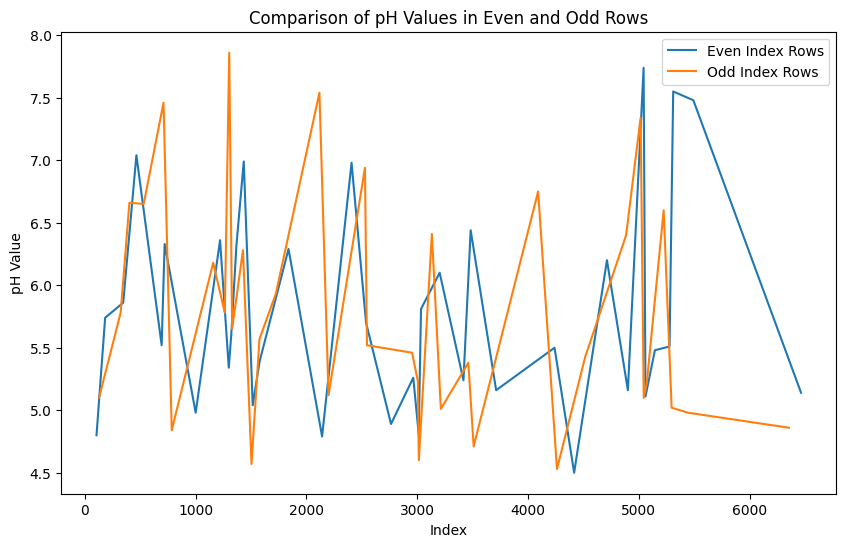

In [7]:
# 提取单数行（偶数索引）和双数行（奇数索引）的pH值
even_index_pH = df_duplicates.iloc[::2]['pH']  # 偶数索引行
odd_index_pH = df_duplicates.iloc[1::2]['pH']  # 奇数索引行

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(even_index_pH.index, even_index_pH, label='Even Index Rows')
plt.plot(odd_index_pH.index, odd_index_pH, label='Odd Index Rows')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('Comparison of pH Values in Even and Odd Rows')
plt.xlabel('Index')
plt.ylabel('pH Value')

# 显示图表
plt.show()

In [8]:
# 改写分类字段的类型
data['TDQS']=data['TDQS'].astype('category')

In [10]:
data.dtypes

pH                          float64
BIO                         float64
PRE                         float64
SRA                         float64
TMP                         float64
VAP                         float64
WIN                         float64
NDVI                        float64
TDQS                       category
LIGHT                       float64
AnalyticalHillshading       float64
Aspect                      float64
ChannelNetworkBaseLevel     float64
ChannelNetworkDistance      float64
ClosedDepressions           float64
ConvergenceIndex            float64
LSFactor                    float64
PlanCurvature               float64
ProfileCurvature            float64
RelativeSlopePosition       float64
Slope                       float64
TopographicWetnessIndex     float64
TotalCatchmentArea          float64
ValleyDepth                 float64
DEM                         float64
LON                         float64
LAT                         float64
dtype: object

In [9]:
X = data.drop(columns='pH')
y = data['pH']

In [10]:
data.columns

Index(['pH', 'BIO', 'PRE', 'SRA', 'TMP', 'VAP', 'WIN', 'NDVI', 'TDQS', 'LIGHT',
       'AnalyticalHillshading', 'Aspect', 'ChannelNetworkBaseLevel',
       'ChannelNetworkDistance', 'ClosedDepressions', 'ConvergenceIndex',
       'LSFactor', 'PlanCurvature', 'ProfileCurvature',
       'RelativeSlopePosition', 'Slope', 'TopographicWetnessIndex',
       'TotalCatchmentArea', 'ValleyDepth', 'DEM', 'LON', 'LAT',
       'prediction_ph'],
      dtype='object')

In [11]:
len(data.columns)

28

In [12]:
X = data[[ 'BIO', 'PRE', 'SRA', 'TMP', 'VAP', 'WIN', 'NDVI', 'TDQS', 'LIGHT',
       'AnalyticalHillshading', 'Aspect', 'ChannelNetworkBaseLevel',
       'ChannelNetworkDistance', 'ClosedDepressions', 'ConvergenceIndex',
       'LSFactor', 'PlanCurvature', 'ProfileCurvature',
       'RelativeSlopePosition', 'Slope', 'TopographicWetnessIndex',
       'TotalCatchmentArea', 'ValleyDepth', 'DEM', 'LON', 'LAT','prediction_ph']]
y = data['pH']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# 定义随机森林超参数的取值范围
param_dist = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_features': [1.0],
    'max_depth': [None] + list(np.arange(1, 28)),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'bootstrap': [True, False]
}

# 创建随机森林回归器
clf = RandomForestRegressor()

# 使用RandomizedSearchCV来寻找最佳参数
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# 打印最佳参数
print('Best Parameters: \n', random_search.best_params_)

# 使用最佳参数对测试集进行评估
best_clf = random_search.best_estimator_
score = best_clf.score(X_test, y_test)
print('Test accuracy:', score)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: 
 {'n_estimators': 370, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 1.0, 'max_depth': 15, 'bootstrap': True}
Test accuracy: 0.755058737811203


In [15]:
# 使用最优参数训练RandomForestRegressor模型
rf = RandomForestRegressor(n_estimators=370,criterion='squared_error', min_samples_split=7, min_samples_leaf= 9, max_features=1.0, max_depth=15, bootstrap= True)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
r2_score(y_test,y_test_pred),r2_score(y_train,y_train_pred)

(0.7546346986267568, 0.8841538166688585)

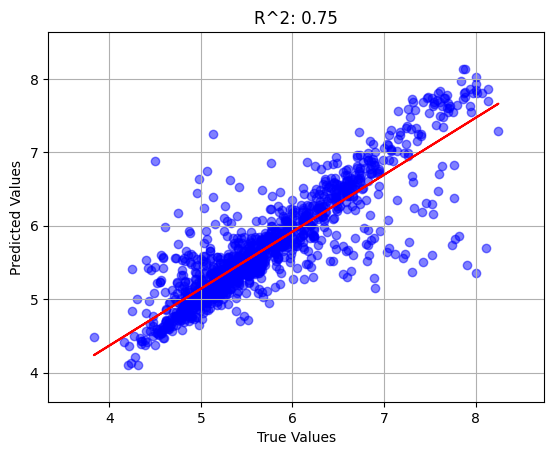

In [16]:
r2 = r2_score(y_test,y_test_pred)
# 画图
plt.scatter(y_test, y_test_pred, c='b', alpha=0.5)

fit = np.polyfit(y_test, y_test_pred,deg=1)
fit_fn = np.poly1d(fit) 
plt.plot(y_test, fit_fn(y_test), c='r')

plt.xlim([min(y_test)-0.5, max(y_test)+0.5])
plt.ylim([min(y_test_pred)-0.5, max(y_test_pred)+0.5])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('R^2: %.2f' % r2)
plt.grid()

plt.show()

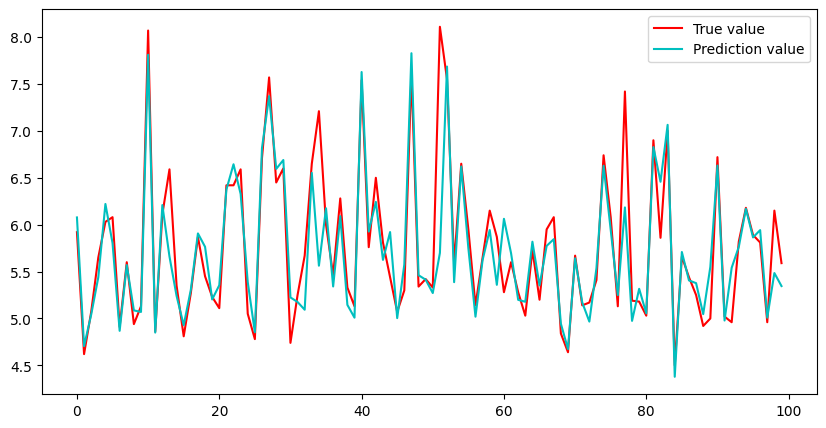

In [17]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test[:100])),y_test[:100],c='r',label='True value')
plt.plot(range(len(y_test_pred[:100])),y_test_pred[:100],c='c',label = 'Prediction value')
plt.legend()
plt.show()

In [18]:
mse_score = mean_squared_error(y_test, y_test_pred)
mae_score = mean_absolute_error(y_test, y_test_pred)
mape_score = mean_absolute_percentage_error(y_test, y_test_pred)
print('Mse:', mse_score,'Mae',mae_score,'Mape',mape_score)


Mse: 0.1643334870993401 Mae 0.23830932457448833 Mape 0.041405345199533296


In [19]:
rf.feature_importances_

array([4.83967602e-03, 3.96934164e-03, 2.99084621e-03, 2.35524566e-03,
       2.27342499e-03, 1.72642925e-03, 6.69539314e-03, 3.53960247e-04,
       5.20254363e-03, 4.97498569e-03, 4.25335698e-03, 2.76501428e-03,
       5.82953268e-03, 5.54608879e-04, 3.65518829e-03, 3.25011130e-03,
       3.83030911e-03, 4.51247755e-03, 5.36117798e-03, 3.14510150e-03,
       4.10057576e-03, 4.53712383e-03, 4.42413555e-03, 3.40985546e-03,
       7.38717356e-03, 6.10609029e-03, 8.97496321e-01])

In [28]:
a = rf.feature_importances_
a[26] = rf.feature_importances_[26]/1000
a

array([0.00483968, 0.00396934, 0.00299085, 0.00235525, 0.00227342,
       0.00172643, 0.00669539, 0.00035396, 0.00520254, 0.00497499,
       0.00425336, 0.00276501, 0.00582953, 0.00055461, 0.00365519,
       0.00325011, 0.00383031, 0.00451248, 0.00536118, 0.0031451 ,
       0.00410058, 0.00453712, 0.00442414, 0.00340986, 0.00738717,
       0.00610609, 0.0008975 ])

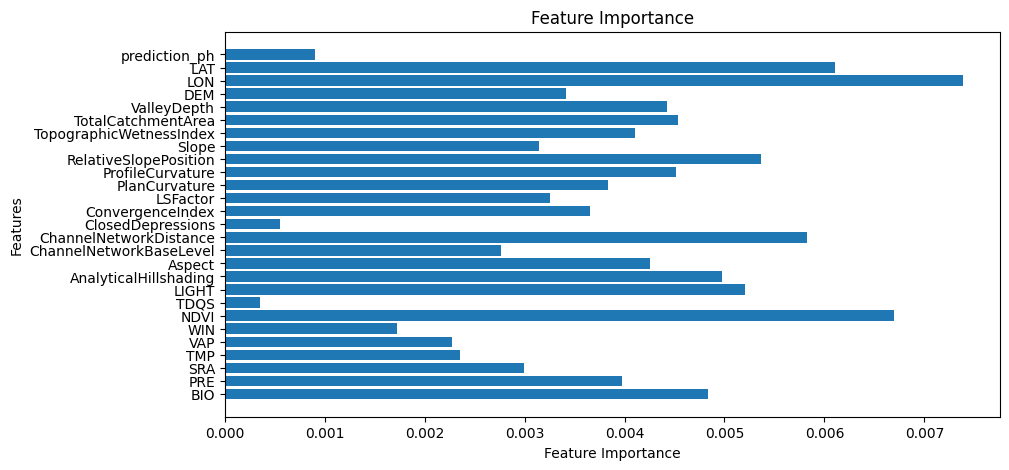

In [30]:
# 绘制特征重要性柱状图
plt.figure(figsize=(10, 5))
plt.barh(data.columns.drop('pH'), a)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [31]:
# 数据标准化后再训练
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler



# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 实例化标准化器

# scaler = StandardScaler()  # Z得分标准化（Standard Scaling）:将数据按属性（按列进行）减去其均值，并除以其标准差。结果的分布将具有均值为 0 和标准差为 1。

scaler = MinMaxScaler()  # 最小-最大标准化（Min-Max Scaling）:将所有特征缩放到 [0, 1] 范围内，或者是其他指定的范围。对异常值非常敏感。

# 加载数据
# scaler = RobustScaler()  # 稳健标准化（Robust Scaling）:使用四分位数范围来缩放数据，因此它对异常值不敏感。
for model in [StandardScaler(),MinMaxScaler(),RobustScaler()]:
    scaler = model

    # 对训练数据进行拟合和转换
    X_train_scaled = scaler.fit_transform(X_train)

    # 对测试数据进行转换
    X_test_scaled = scaler.transform(X_test)

    # 训练随机森林模型
    rf.fit(X_train_scaled, y_train)

    # 模型评估（例如，使用 R2 分数）
    r2_score = rf.score(X_test_scaled, y_test)
    print("R2 Score: ", r2_score)



R2 Score:  0.5103115097409223
R2 Score:  0.5095265028834568
R2 Score:  0.5097565498510321


In [49]:
# 递归特征消除 (选择最佳组合特征)
from sklearn.feature_selection import RFE,RFECV

# RFE
selector = RFECV(rf,step=1,cv=5,n_jobs=4)
selector = selector.fit(X_train, y_train)

# 查看选中的特征
selected_features = selector.support_
# 计算测试集的 R2 分数
y_pred = selector.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Selected Features: ", selected_features)
print("Number of Selected Features: ", selector.n_features_)
print("R2 Score: ", r2)

Selected Features:  [False False False False False False False False False False False False
  True False False False False False False False False False False  True
  True  True]
Number of Selected Features:  4
R2 Score:  0.3133341766468931


In [50]:
# 迭代优化 (选择最佳组合特征)

best_score = 0
best_features = None

# 尝试不同数量的特征
for i in range(1, X_train.shape[1] + 1):
    # RFE 选择特征
    selector = RFE(rf, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)

    # 预测并计算 R2 分数
    y_pred = selector.predict(X_test)
    score = r2_score(y_test, y_pred)

    # 更新最佳分数和特征
    if score > best_score:
        best_score = score
        best_features = selector.support_

print("Best R2 Score: ", best_score)
print("Best Features: ", best_features)

Best R2 Score:  0.34229846130490116
Best Features:  [ True  True  True False False False  True False  True False False False
  True False False False False False  True  True False False  True  True
  True  True]
